# CSC17104 – Programming for Data Science 
## Final Project: **Analyzing Mobile Device Usage and User Behavior**

## Group Members:
- 22127152 - Lê Gia Huy
- 22127031 - Nguyễn Duy Bảo
- 22127203 - Võ Ngọc Khoa


## 1. Collecting Data

### Dataset Overview
- **Subject**: The dataset focuses on **mobile device usage and user behavior**, capturing metrics like app usage time, screen-on time, battery consumption, and demographic details.
- **Source**: The data is titled "Mobile Device Usage and User Behavior Dataset," authored by **Seyedvala Khorasani** with collaboration from **Vala Khorasani**, and is available on [Kaggle](https://www.kaggle.com/).

### Data License and Usage
- The dataset is released under the **Apache License, Version 2.0**.  
- This license permits the use of the dataset for educational, research, and commercial purposes, provided that appropriate credit is given and modifications (if any) are documented.  
- For full details of the license, refer to the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

### Data Collection Method
#### Sources
The dataset was generated using simulated data based on realistic mobile usage patterns, informed by:
- Publicly available research studies
- Industry reports from organizations like **Statista** and **Pew Research**
- Surveys related to mobile device usage

#### Collection Methodology
To create the dataset:
1. **Key Variables**: Defined using common metrics in mobile usage research, such as:
   - App usage time
   - Screen-on time
   - Battery drain
   - Data usage
   - Demographic details (age and gender)
2. **User Profiles**: Generated to represent diverse mobile usage behaviors, with app usage time randomized within realistic ranges.
3. **Behavior Patterns**:
   - App usage time varies between 30 to 300 minutes per day.
   - Screen-on time aligns with app usage patterns.
   - Battery drain and data usage are estimated based on average device specifications and typical user habits.
4. **Data Structuring**: The data was organized into a CSV format with clearly defined columns for ease of analysis.
5. **Quality Assurance**:
   - Consistency and accuracy were ensured through quality checks.
   - Data reflects diverse user behavior classes.
6. **Ethical Considerations**:
   - No personally identifiable information is included.
   - Simulated data respects user privacy.

#### Updates
- The dataset is periodically updated to reflect emerging trends in mobile device usage.
- Users are encouraged to provide feedback to support future enhancements.


## 2. Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 3. Data exploring & Data preprocessing

Read the datasest and display basic information about the dataset

In [2]:
file_path = 'user_behavior_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Cleaning the data file code

In [3]:
print("Missing values before handling:")
print(data.isnull().sum())

data['Age'] = data['Age'].fillna(0)
data['App Usage Time (min/day)'] = data['App Usage Time (min/day)'].fillna(0)
data['Battery Drain (mAh/day)'] = data['Battery Drain (mAh/day)'].fillna(0)
data['Number of Apps Installed'] = data['Number of Apps Installed'].fillna(0)
data['Data Usage (MB/day)'] = data['Data Usage (MB/day)'].fillna(0)
data['Screen On Time (hours/day)'] = data['Screen On Time (hours/day)'].fillna(0)

print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values before handling:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Missing values after handling:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


### 3.1. The meaning of each column/row


How many rows and how many columns?

In [4]:
n_rows, n_cols = data.shape
print(f'Number of rows: ',n_rows)
print(f'Number of cols: ',n_cols)

Number of rows:  700
Number of cols:  11


#### The meaning of each row:
- Each row provides some infomation about a single user’s mobile usage behavior, device characteristics, and demographic information, which can be used for analysis and modeling.
#### The meaning of each column:
- User ID: Unique identifier for the user.
- Device Model: The specific model of the user’s smartphone.
- Operating System: The OS running on the user’s device (e.g., Android or iOS).
- App Usage Time (min/day): The total time (in minutes) the user spends on mobile apps daily.
- Screen On Time (hours/day): The total number of hours the screen remains active daily.
- Battery Drain (mAh/day): The daily battery consumption of the user’s device in milliampere-hours (mAh).
- Number of Apps Installed: Total number of applications installed on the user’s device.
- Data Usage (MB/day): The daily amount of mobile data consumed by the user in megabytes (MB).
- Age: The age of the user.
- Gender: The gender of the user (Male or Female).
- User Behavior Class: A classification (from 1 to 5) categorizing the user based on their mobile usage behavior (e.g., light, moderate, or extreme usage).

### 3.2. Duplicated rows

Are there duplicated rows?

In [5]:
duplicated_rows = data[data.duplicated()]

print(f"Number of duplicated rows: {len(duplicated_rows)}")

if len(duplicated_rows) > 0:
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found in the dataset.")

Number of duplicated rows: 0
No duplicated rows found in the dataset.


In [6]:
# Drop duplicated rows if needed
print("\nNumber of duplicate rows before handling:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Number of duplicate rows after handling:", data.duplicated().sum())


Number of duplicate rows before handling: 0
Number of duplicate rows after handling: 0


### 3.3. What is the current data type of each column? Are there columns having inappropriate data types?

In [7]:
print("Data types of each column:")
data.dtypes

Data types of each column:


User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

After examining the dataset, we observed that the columns `Device Model`, `Operating System`, and `Gender` are of type `object`. Since these columns only contain categorical or textual data, it is more efficient and appropriate to convert them to more specific types. Here are the reasons and suggested conversions:

Why Convert `Device Model` and `Operating System` to `string`?
- **Device Model** and **Operating System** contain textual data, such as the model names of devices and the operating system types ('iOS', 'Android'). 
- Converting these columns to `string` helps ensure that they are treated explicitly as text and optimizes string operations, improving performance and consistency.

Why Convert `Gender` to `category`?
- The **Gender** column contains a small number of unique values (e.g., 'Male', 'Female'), making it an ideal candidate for the `category` data type.
- Using `category` instead of `object` for this column improves memory efficiency and allows for faster categorical operations (such as comparisons and aggregations).

In [8]:
data['Device Model'] = data['Device Model'].astype('string')
data['Operating System'] = data['Operating System'].astype('string')
data['Gender'] = data['Gender'].astype('category')

In [9]:
print("Data types of each column:")
data.dtypes

Data types of each column:


User ID                          int64
Device Model                    string
Operating System                string
App Usage Time (min/day)         int64
Screen On Time (hours/day)     float64
Battery Drain (mAh/day)          int64
Number of Apps Installed         int64
Data Usage (MB/day)              int64
Age                              int64
Gender                        category
User Behavior Class              int64
dtype: object

In our dataset, we have two columns that represent time-related data but are measured in different units:

- **App Usage Time (min/day)**: Represented in minutes.
- **Screen On Time (hours/day)**: Represented in hours.

To make analysis easier and more consistent, it is better to standardize these columns to the same unit of measurement. Since **App Usage Time** is already in **minutes/day**, we will convert **Screen On Time (hours/day)** into **minutes/day** for consistency.

##### Why Convert the Units?
1. **Consistency**: Using the same unit for both columns will ensure consistency across the dataset and avoid confusion when comparing or combining these columns.
2. **Simplified Analysis**: Having both time-based columns in the same unit makes mathematical operations (such as comparisons or aggregations) more straightforward.
3. **Ease of Modeling**: Most machine learning models and statistical analyses expect consistent units, and standardizing the units simplifies feature engineering.

In [10]:
data['Screen On Time (min/day)'] = data['Screen On Time (hours/day)'] * 60
data = data.drop(columns=['Screen On Time (hours/day)'])

In [11]:
data[['App Usage Time (min/day)', 'Screen On Time (min/day)']]

,App Usage Time (min/day),Screen On Time (min/day)
0,393,384.0
1,268,282.0
2,154,240.0
3,239,288.0
4,187,258.0
...,...,...
695,92,234.0
696,316,408.0
697,99,186.0
698,62,102.0


These changes ensure that the data is properly formatted and optimized for analysis, and the dataset is now ready for further exploration and modeling.

### 3.4. With each numerical column, how are values distributed?

Numerical Columns to Analyze:
- App Usage Time (min/day)
- Screen On Time (hours/day)
- Battery Drain (mAh/day)
- Number of Apps Installed
- Data Usage (MB/day)
- Age
- User Behavior Class

#### 3.4.1. What is the percentage of missing values?

In [12]:
numerical_columns = [
    'App Usage Time (min/day)',
    'Screen On Time (min/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age',
    'User Behavior Class'
]

for column in numerical_columns:
    print(f"Analyzing column: {column}")
    
    missing_percentage = data[column].isnull().mean() * 100
    print(f"Percentage of missing values: {missing_percentage:.2f}%")
    
    print("-" * 50) 

Analyzing column: App Usage Time (min/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Screen On Time (min/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Battery Drain (mAh/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Number of Apps Installed
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Data Usage (MB/day)
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: Age
Percentage of missing values: 0.00%
--------------------------------------------------
Analyzing column: User Behavior Class
Percentage of missing values: 0.00%
--------------------------------------------------


#### 3.4.2. Min? max? Are they abnormal?

In [13]:
for column in numerical_columns:
    print(f"Analyzing column: {column}")
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"Min: {min_value}, Max: {max_value}")
    
    if min_value < 0 or max_value > data[column].quantile(0.99):  
        print(f"Warning: Potential abnormal values detected in {column}")
    print("-" * 50) 

Analyzing column: App Usage Time (min/day)
Min: 30, Max: 598
--------------------------------------------------
Analyzing column: Screen On Time (min/day)
Min: 60.0, Max: 720.0
--------------------------------------------------
Analyzing column: Battery Drain (mAh/day)
Min: 302, Max: 2993
--------------------------------------------------
Analyzing column: Number of Apps Installed
Min: 10, Max: 99
--------------------------------------------------
Analyzing column: Data Usage (MB/day)
Min: 102, Max: 2497
--------------------------------------------------
Analyzing column: Age
Min: 18, Max: 59
--------------------------------------------------
Analyzing column: User Behavior Class
Min: 1, Max: 5
--------------------------------------------------


Based on the analysis of the numerical columns, we observed that several columns have maximum values that exceed the 99th percentile, which may indicate the presence of outliers. Specifically, the following columns have been flagged:

- App Usage Time (min/day): Max = 598
- Screen On Time (hours/day): Max = 12.0
- Battery Drain (mAh/day): Max = 2993
- Data Usage (MB/day): Max = 2497

While these values are not necessarily incorrect, they are higher than most of the data points, which could indicate **outliers** or **extreme values**.

##### Next Steps:
To investigate further, we should visualize the distributions of these numerical columns. Plotting **box plots** and **histograms** will help us better understand the spread of the data and determine if any values are indeed outliers that may require adjustment or removal.

Let's proceed with visualizing the data to assess if any actions are needed.

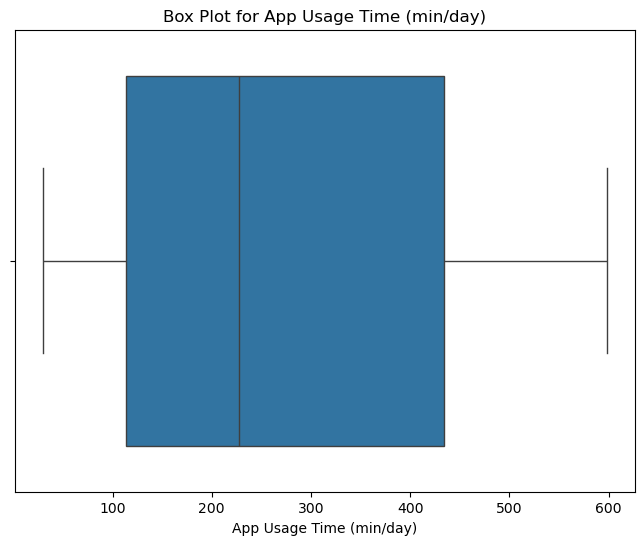

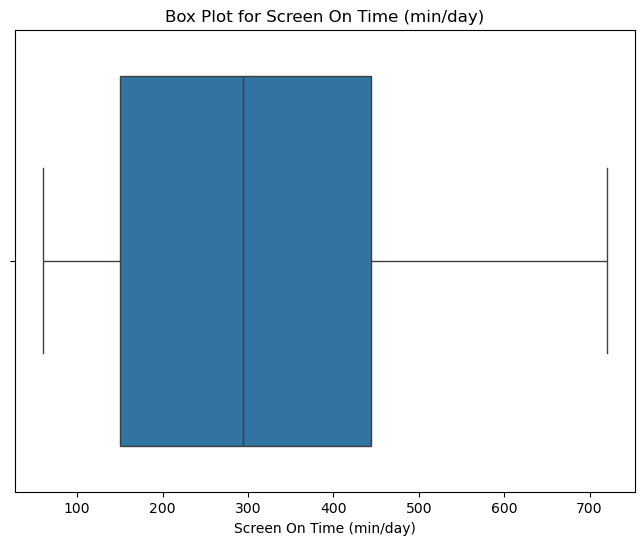

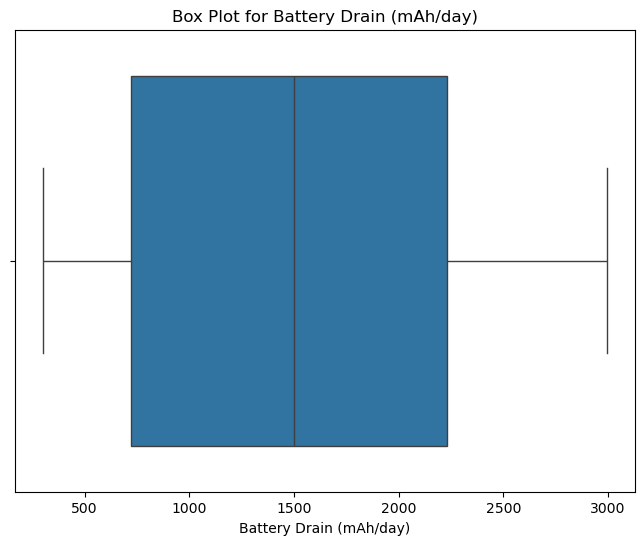

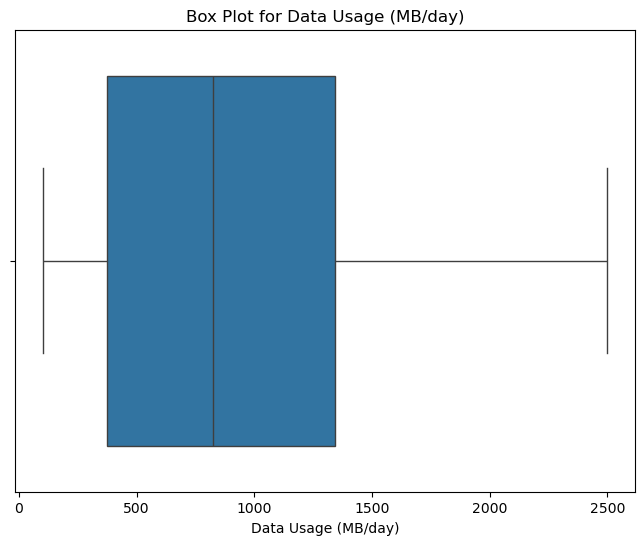

In [14]:
numerical_columns = [
    'App Usage Time (min/day)',
    'Screen On Time (min/day)',
    'Battery Drain (mAh/day)',
    'Data Usage (MB/day)'
]

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

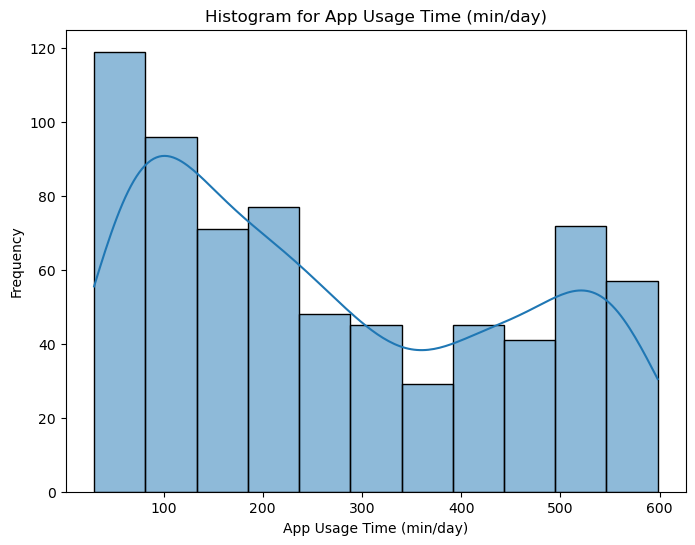

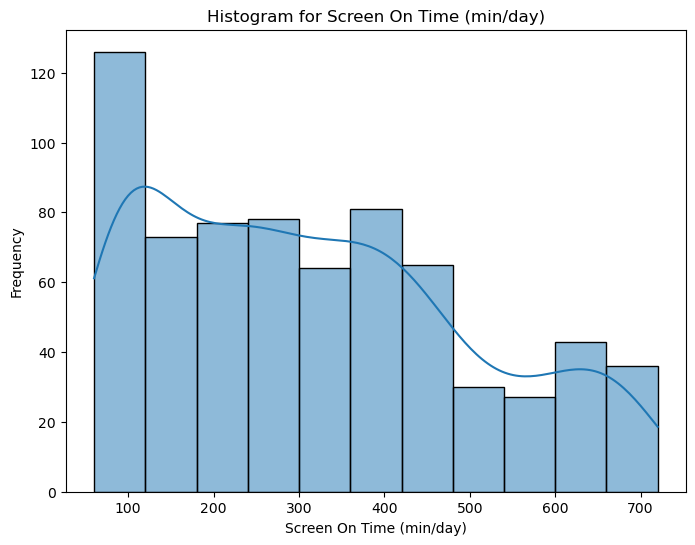

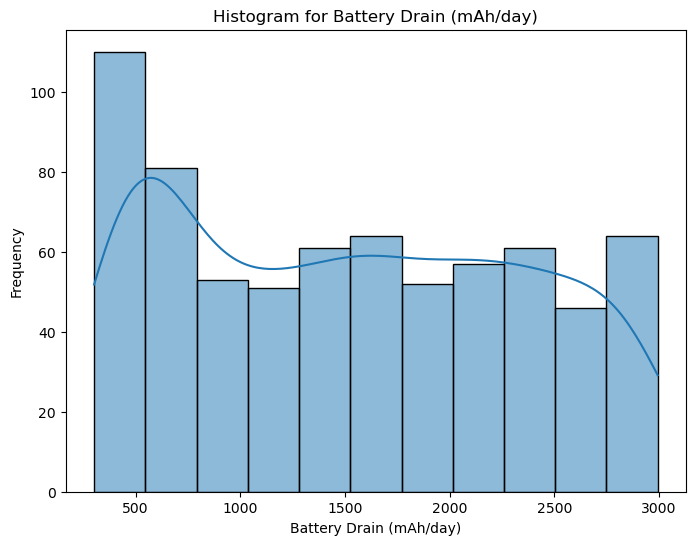

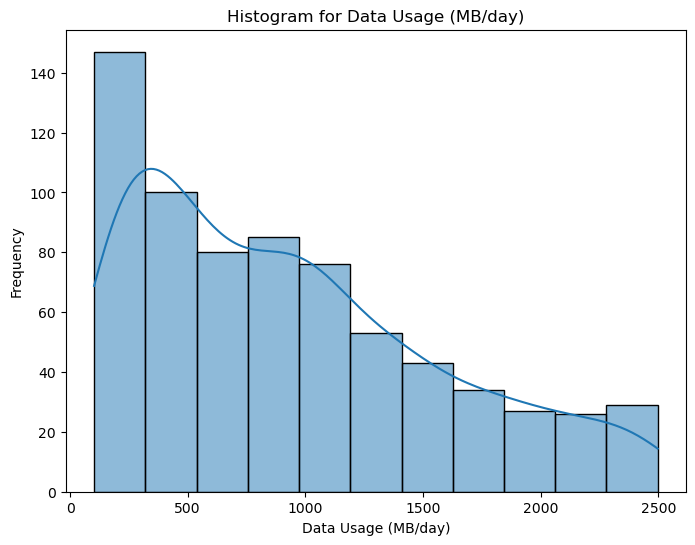

In [15]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##### Conclusion on Outliers

After reviewing the **box plots** and **histograms** for the numerical columns, we observed that there are no significant abnormalities or extreme outliers in the data. The values appear to follow expected distributions, and there are no obvious data points that fall far outside the normal range.

##### Outcome:
- The **max values** in columns like **App Usage Time (min/day)**, **Screen On Time (hours/day)**, **Battery Drain (mAh/day)**, and **Data Usage (MB/day)**, which were flagged during the initial analysis, do not represent outliers that require further action.
- The overall distribution of the data appears to be reasonable, and the dataset is ready for further analysis without any need for outlier removal or adjustments.

Therefore, no additional data cleaning or transformation is required for outliers at this stage.

### 3.5. With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [16]:
categorical_columns = data.select_dtypes(include=['category', 'string']).columns
categorical_summary = {}
for column in categorical_columns:
    column_data = data[column]
    categorical_summary[column] = {
        'Missing Percentage': column_data.isnull().mean() * 100,
        'Unique Values Count': column_data.nunique(),
        'Sample Values': column_data.unique()[:5]
    }

for column, stats in categorical_summary.items():
    print(f"\nColumn: {column}")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")
    print("-" * 50)


Column: Device Model
  Missing Percentage: 0.0
  Unique Values Count: 5
  Sample Values: <StringArray>
[    'Google Pixel 5',          'OnePlus 9',       'Xiaomi Mi 11',
          'iPhone 12', 'Samsung Galaxy S21']
Length: 5, dtype: string
--------------------------------------------------

Column: Operating System
  Missing Percentage: 0.0
  Unique Values Count: 2
  Sample Values: <StringArray>
['Android', 'iOS']
Length: 2, dtype: string
--------------------------------------------------

Column: Gender
  Missing Percentage: 0.0
  Unique Values Count: 2
  Sample Values: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
--------------------------------------------------


We have analyzed the three categorical columns: **Device Model**, **Operating System**, and **Gender**. Below are the findings:

##### 1. **Device Model**:
- **Percentage of Missing Values**: 0.00%
- **Number of Unique Values**: 5
- **Sample Unique Values**: 
    - Google Pixel 5
    - OnePlus 9
    - Xiaomi Mi 11
    - iPhone 12
    - Samsung Galaxy S21
- **Conclusion**: No abnormal values detected. The device models appear to be a reasonable set of common smartphones.

##### 2. **Operating System**:
- **Percentage of Missing Values**: 0.00%
- **Number of Unique Values**: 2
- **Sample Unique Values**: 
    - Android
    - iOS
- **Conclusion**: The values are as expected, with only two operating systems (Android and iOS), which is typical for mobile devices.

##### 3. **Gender**:
- **Percentage of Missing Values**: 0.00%
- **Number of Unique Values**: 2
- **Sample Unique Values**: 
    - Male
    - Female
- **Conclusion**: The data contains two categories for gender. While these are the most common categories in many datasets, it's important to be mindful of the fact that the dataset does not account for other gender identities. If necessary, this column could be expanded to reflect a more inclusive set of categories.

##### Summary:
- All categorical columns have no missing values and contain a reasonable number of unique values.
- No abnormalities have been found in the data for the categorical variables.

## 4. Asking meaningful questions

#### 4.1. What factors influence battery drain the most?

**Benefits**: Helps identify patterns in device usage leading to high battery consumption. It is also useful for designing battery-efficient apps or recommending user behaviors to optimize battery life.

In [17]:
numeric_columns = ['Battery Drain (mAh/day)', 'App Usage Time (min/day)', 
                   'Screen On Time (min/day)', 'Number of Apps Installed', 
                   'Data Usage (MB/day)']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
print(data[numeric_columns].describe())

       Battery Drain (mAh/day)  App Usage Time (min/day)  \
count               700.000000                700.000000   
mean               1525.158571                271.128571   
std                 819.136414                177.199484   
min                 302.000000                 30.000000   
25%                 722.250000                113.250000   
50%                1502.500000                227.500000   
75%                2229.500000                434.250000   
max                2993.000000                598.000000   

       Screen On Time (min/day)  Number of Apps Installed  Data Usage (MB/day)  
count                700.000000                700.000000           700.000000  
mean                 316.362857                 50.681429           929.742857  
std                  184.115035                 26.943324           640.451729  
min                   60.000000                 10.000000           102.000000  
25%                  150.000000                 26.000

Computes the Pearson correlation coefficients to quantifies the strength and direction of relationships between features

In [18]:
correlation = data[numeric_columns].corr()
print(correlation)

                          Battery Drain (mAh/day)  App Usage Time (min/day)  \
Battery Drain (mAh/day)                  1.000000                  0.956385   
App Usage Time (min/day)                 0.956385                  1.000000   
Screen On Time (min/day)                 0.948983                  0.950333   
Number of Apps Installed                 0.961853                  0.955253   
Data Usage (MB/day)                      0.932276                  0.942308   

                          Screen On Time (min/day)  Number of Apps Installed  \
Battery Drain (mAh/day)                   0.948983                  0.961853   
App Usage Time (min/day)                  0.950333                  0.955253   
Screen On Time (min/day)                  1.000000                  0.946975   
Number of Apps Installed                  0.946975                  1.000000   
Data Usage (MB/day)                       0.941322                  0.934800   

                          Data Usage (MB/day

Visualizes the correlation as a heatmap with annotations.

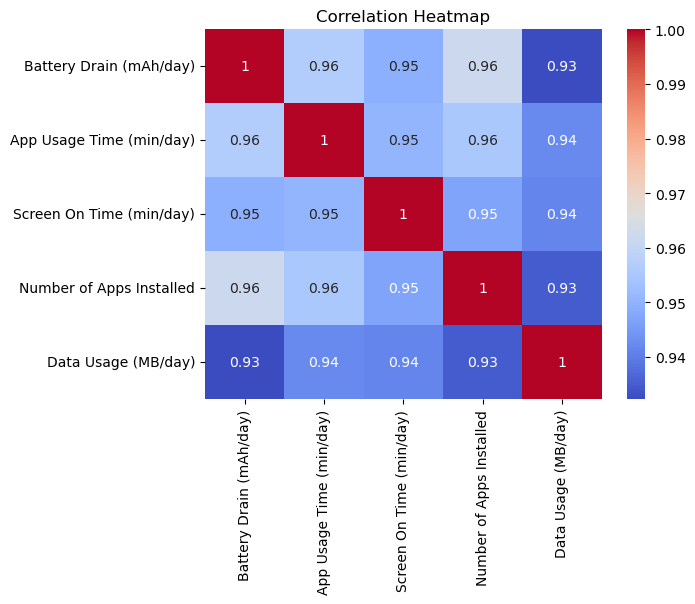

In [19]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Iterates through each feature and creates a scatterplot against "Battery Drain" to highlights clusters or anomalies for deeper investigation.

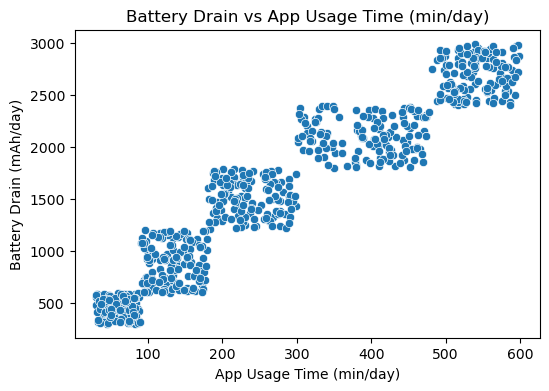

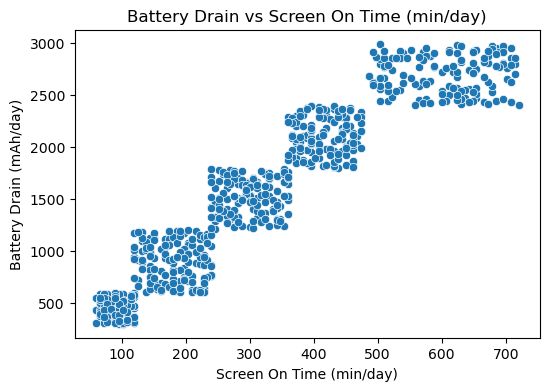

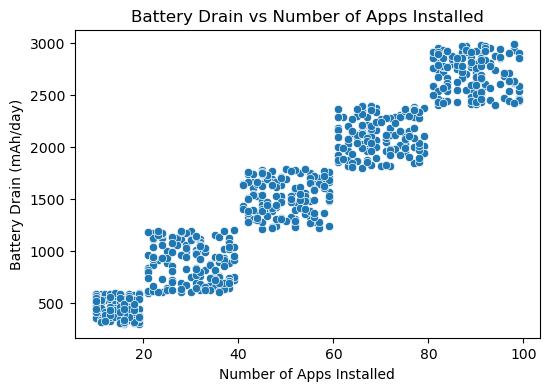

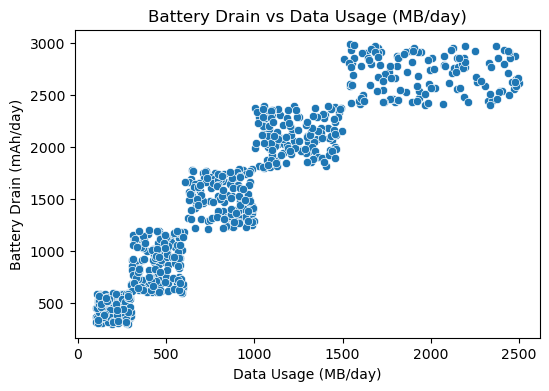

In [20]:
features = ['App Usage Time (min/day)', 'Screen On Time (min/day)', 
            'Number of Apps Installed', 'Data Usage (MB/day)']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y='Battery Drain (mAh/day)')
    plt.title(f"Battery Drain vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Battery Drain (mAh/day)')
    plt.show()


Implements a simple linear regression formula to calculate:
- Slope (m): Rate of change in Battery Drain with respect to a feature.
- Intercept (b): Predicted Battery Drain when the feature value is zero.

In [21]:
def linear_regression(X, Y):
    X_mean, Y_mean = np.mean(X), np.mean(Y)
    m = np.cov(X, Y, bias=True)[0, 1] / np.var(X)
    b = Y_mean - m * X_mean 
    return m, b

for feature in features:
    m, b = linear_regression(data[feature], data['Battery Drain (mAh/day)'])
    print(f"Linear relationship for {feature}:")
    print(f"  Slope (m): {m:.2f}, Intercept (b): {b:.2f}\n")


Linear relationship for App Usage Time (min/day):
  Slope (m): 4.42, Intercept (b): 326.48

Linear relationship for Screen On Time (min/day):
  Slope (m): 4.22, Intercept (b): 189.45

Linear relationship for Number of Apps Installed:
  Slope (m): 29.24, Intercept (b): 43.11

Linear relationship for Data Usage (MB/day):
  Slope (m): 1.19, Intercept (b): 416.55



Analysis of Factors Affecting Battery Drain

1. App Usage Time (min/day)  
   - Slope: 4.42, Correlation: 0.956  
   - Major contributor, reflecting high energy demand from app usage and background processes.

2. Screen On Time (min/day)  
   - Slope: 4.22, Correlation: 0.949  
   - Significant factor due to the energy-intensive nature of keeping the screen active.

3. Number of Apps Installed  
   - Slope: 29.24, Correlation: 0.962  
   - Most influential, with the steepest slope and highest correlation, likely due to background activities.

4. Data Usage (MB/day) 
   - Slope: 1.19, Correlation: 0.932  
   - Moderate impact, reflecting the cumulative effect of network activity.

Key Insights
- **Most Influential**: Number of Apps Installed (\(m = 29.24, r = 0.962\)).  
- **Significant Contributors**: App Usage Time and Screen On Time.  
- **Optimization Tips**: Reduce app usage, screen-on time, installed apps, and data activity to save battery.

#### 4.2. How does app usage time vary across different age groups and genders?

**Benefit**: 
- Advertisements can be customized for age groups with high app usage, ensuring better engagement.
- High-usage age groups can inform server scaling strategies to ensure seamless app performance during peak hours.

Divides the continuous Age column into discrete intervals (age groups) for easier analysis and visualization. And "groups the data by Age Group and Gender" process to compute aggregated statistics for App Usage Time.

In [22]:
bins = [0, 20, 30, 40, 50, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

usage_summary = data.groupby(['Age Group', 'Gender'])['App Usage Time (min/day)'].mean().reset_index()

print(usage_summary)

  Age Group  Gender  App Usage Time (min/day)
0       <20  Female                252.705882
1       <20    Male                278.304348
2     20-30  Female                268.670588
3     20-30    Male                262.387097
4     30-40  Female                282.175824
5     30-40    Male                271.142857
6     40-50  Female                264.369863
7     40-50    Male                270.512195
8       50+  Female                275.300000
9       50+    Male                275.797753


Visualizes the average App Usage Time for each age group, split by gender.

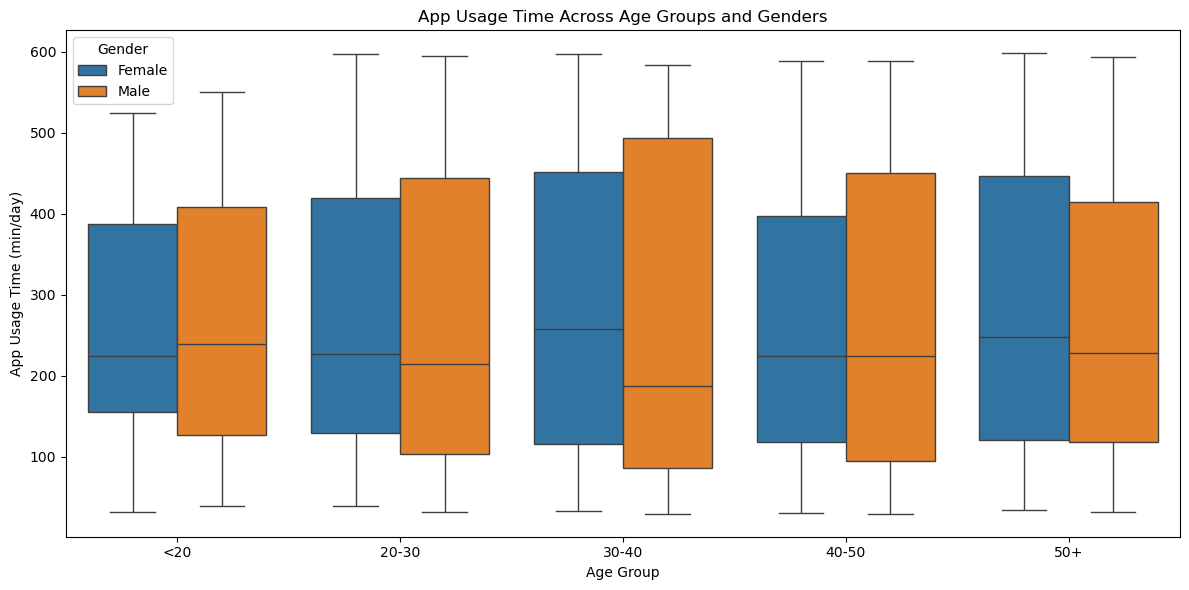

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Age Group', y='App Usage Time (min/day)', hue='Gender')
plt.title('App Usage Time Across Age Groups and Genders')
plt.xlabel('Age Group')
plt.ylabel('App Usage Time (min/day)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Based on the results:
1. Median Comparison:
- Across all age groups, the median app usage time for females is consistently higher than for males.
- The median values across age groups are relatively stable, but slight variations exist. For example, females in the 30–40 age group have a noticeably higher median compared to other age groups, while males in the same group have the lowest median.


2. Age Group Variations:
- Younger (<20) and older (50+) age groups show medians that are comparable to or slightly higher than those of middle age groups (20–50), particularly for males.
- The 30–40 age group shows the largest contrast between genders, with females having the highest median and males having the lowest median.

3. Spread of Usage Times:
- The interquartile range (IQR) for males is wider in certain age groups (e.g., <20 and 30–40), indicating greater variability in their app usage.
- Outliers are present in all groups, reflecting that some individuals deviate significantly from typical usage patterns.

4. General Trends:
- App usage medians for females remain relatively stable or slightly increase with age, peaking in the 30–40 group.
- For males, medians show slight fluctuations but drop noticeably in the 30–40 group.

Benefits Analysis:
1. Targeted Advertisements:
- The 30–40 age group for females is a prime audience for targeted advertisements due to their high app usage. Campaigns focusing on this demographic could achieve higher engagement.
- Other age groups with consistent or higher-than-average usage, such as younger (<20) males and females, also present valuable opportunities for tailored ads.
2. Server Scaling Strategies:
- The high app usage in the <20 and 50+ groups, combined with variability across genders, indicates the need to allocate sufficient server resources for these groups during peak times.
- Gender-specific usage patterns, such as females' high and consistent app usage, should inform resource allocation.

#### 4.3. Is there a significant correlation between the number of apps installed and the daily data usage and battery drain across different operating systems?

**Benefit**:
- Helps in understanding if the number of installed apps has a disproportionate impact on data consumption and battery usage for users on different platforms (Android vs. iOS).
- Insights from this question can inform device optimization efforts, app management practices, and help users manage data and battery consumption better.

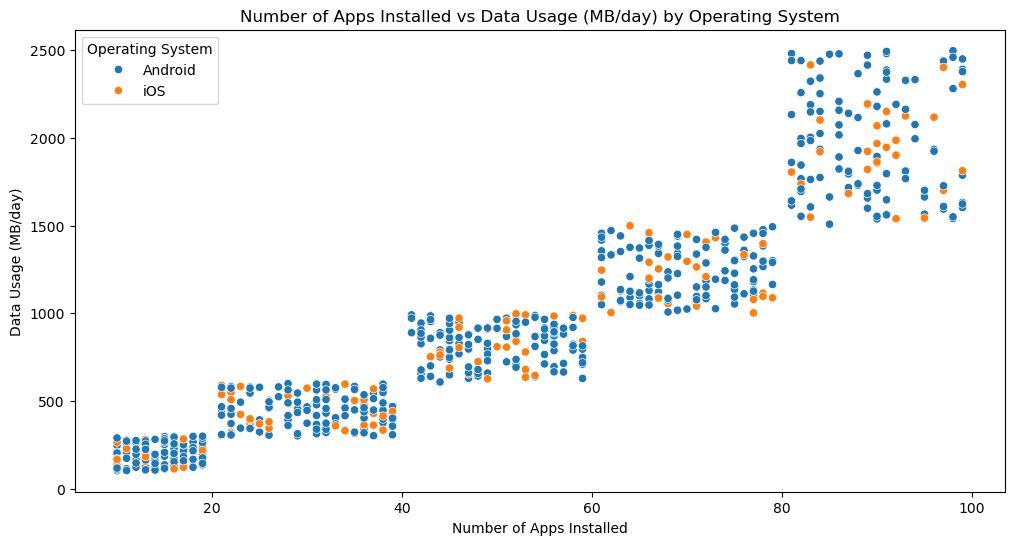

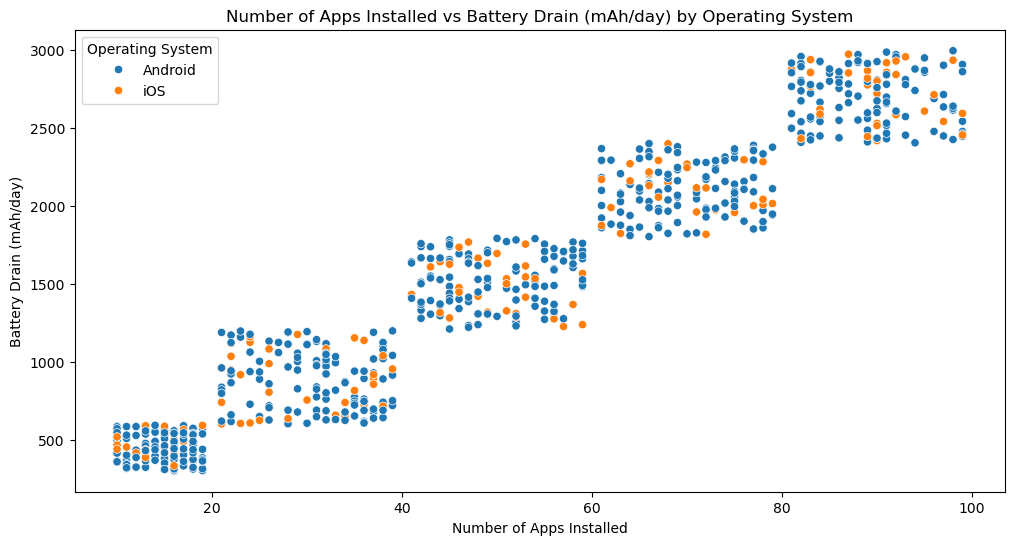

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Number of Apps Installed", y="Data Usage (MB/day)", hue="Operating System", data=data)
plt.title("Number of Apps Installed vs Data Usage (MB/day) by Operating System")
plt.xlabel("Number of Apps Installed")
plt.ylabel("Data Usage (MB/day)")
plt.legend(title="Operating System")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Number of Apps Installed", y="Battery Drain (mAh/day)", hue="Operating System", data=data)
plt.title("Number of Apps Installed vs Battery Drain (mAh/day) by Operating System")
plt.xlabel("Number of Apps Installed")
plt.ylabel("Battery Drain (mAh/day)")
plt.legend(title="Operating System")
plt.show()


Correlation Analysis for Entire Dataset:
Pearson Correlation (Apps Installed vs Data Usage): 0.93
Pearson Correlation (Apps Installed vs Battery Drain): 0.96

Correlation Analysis for Android:
  Correlation with Data Usage: 0.93
  Correlation with Battery Drain: 0.96

Correlation Analysis for iOS:
  Correlation with Data Usage: 0.94
  Correlation with Battery Drain: 0.96


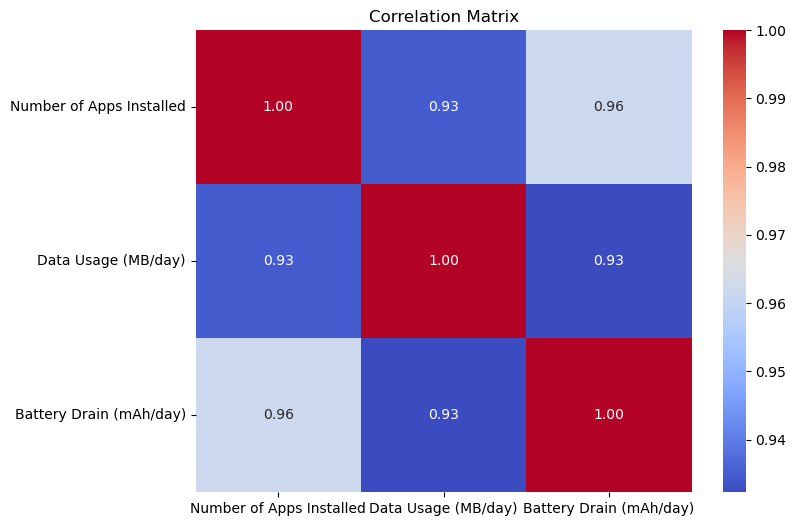

In [25]:
def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return numerator / denominator

corr_apps_data = pearson_correlation(data["Number of Apps Installed"], data["Data Usage (MB/day)"])
corr_apps_battery = pearson_correlation(data["Number of Apps Installed"], data["Battery Drain (mAh/day)"])

print("\nCorrelation Analysis for Entire Dataset:")
print(f"Pearson Correlation (Apps Installed vs Data Usage): {corr_apps_data:.2f}")
print(f"Pearson Correlation (Apps Installed vs Battery Drain): {corr_apps_battery:.2f}")

for os in data["Operating System"].unique():
    os_data = data[data["Operating System"] == os]
    corr_data = pearson_correlation(os_data["Number of Apps Installed"], os_data["Data Usage (MB/day)"])
    corr_battery = pearson_correlation(os_data["Number of Apps Installed"], os_data["Battery Drain (mAh/day)"])
    
    print(f"\nCorrelation Analysis for {os}:")
    print(f"  Correlation with Data Usage: {corr_data:.2f}")
    print(f"  Correlation with Battery Drain: {corr_battery:.2f}")


correlation_matrix = data[["Number of Apps Installed", "Data Usage (MB/day)", "Battery Drain (mAh/day)"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Based on the results of correlation analysis and also all the graphs above, we can conclude that
- **Entire Dataset**:
    - **Correlation between Apps Installed and Data Usage (𝑟=0.93)**: The correlation is very strong and positive, indicating that as the number of apps installed increases, daily data usage increases significantly across all devices.
    - **Correlation between Apps Installed and Battery Drain (𝑟=0.96)**: Similarly, there is a very strong positive correlation, meaning devices with more installed apps experience significantly higher battery drain.
- **By Operating System**:
    - **Android**:
        - **Apps Installed vs Data Usage (𝑟=0.93)**: A very strong positive correlation exists, showing that Android users with more apps installed tend to use significantly more data.
        - **Apps Installed vs Battery Drain (𝑟=0.96)**: A very strong positive relationship, suggesting more apps on Android devices lead to higher battery consumption.
    - **iOS**:
        - **Apps Installed vs Data Usage (𝑟=0.94)**: A very strong positive correlation, similar to Android, indicating that iOS users with more apps installed consume significantly more data.
        - **Apps Installed vs Battery Drain (r=0.96)**: Again, a very strong positive relationship, indicating that more apps on iOS devices also result in higher battery drain.

**Overall Conclusion**:
- Across the entire dataset and within both Android and iOS groups, there is a very strong positive correlation between: Number of Apps Installed and Data Usage, and Number of Apps Installed and Battery Drain.
- These correlations suggest that the number of installed apps is a significant factor influencing both data usage and battery consumption, regardless of the operating system.
- The correlations are slightly higher for iOS compared to Android, but the difference is negligible.

**Insights**:
- Encourage users to limit the number of installed apps to reduce battery drain and data consumption.
- Both Android and iOS developers could optimize their platforms to minimize the impact of installed apps on data and battery usage.

#### 4.4 How does Age influence Battery Drain (mAh/day) and App Usage Time (min/day) across different Operating Systems? Is there a significant difference in these relationships for Android vs. iOS users?

**Benefits**:
- Identifying how age affects app usage and battery drain on different platforms can help create age-targeted optimization strategies or features for devices running Android or iOS.

In [26]:
android_data = data[data['Operating System'] == 'Android']
ios_data = data[data['Operating System'] == 'iOS']

First before answering this question, we'll use two functions are "calculate_regression" and "analyze_relationship"
- **calculate_regression**:
    - There will be 2 key elements that are "x_mean" and "y-mean". These calculate the mean (average) of the 𝑥 and 𝑦 variables. The mean is a fundamental statistical property used to center the data.
    - "numerator" Computes the covariance between x and y. It captures the direction and strength of the relationship between the variables
    - "denominator" Calculates the variance of x, which represents how much x varies around its mean
    - "slope": It represents the rate of change of y with respect to x. For every 1-unit increase in x,y is expected to change by the value of the slope. Formula: slope = Covariance(x,y)/Variance(x)
    - "intercept": intercept=ymean−(slope * xmean). This is the value of y when x = 0
- This function implements manual linear regression, making the process transparent and free from the reliance on external libraries.

In [ ]:
def calculate_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - (slope * x_mean)
    return slope, intercept

- **analyze_relationship**:
    - This function examines the relationship between two columns (x and y) in a dataset for a specific subset of data (e.g., operating system users). It utilizes the calculate_regression function to derive the slope and intercept of the linear relationship.
        - The function filters relevant data columns (x_col and y_col) from the input dataset.
        - It calls calculate_regression to compute the slope and intercept, which define the linear relationship.
- It is modular and designed to apply the regression process to specific subsets of the data, such as Android or iOS users.

In [ ]:
def analyze_relationship(data, x_col, y_col, os_name):
    x = data[x_col]
    y = data[y_col]

    slope, intercept = calculate_regression(x, y)
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label="Data points")
    plt.plot(x, slope * x + intercept, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}")
    plt.title(f'{x_col} vs. {y_col} ({os_name})', fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{os_name}: {x_col} vs. {y_col}")
    print(f"  Slope: {slope}")
    print(f"  Intercept: {intercept}")
    print()

analyze_relationship(android_data, 'Age', 'Battery Drain (mAh/day)', 'Android')
analyze_relationship(ios_data, 'Age', 'Battery Drain (mAh/day)', 'iOS')
analyze_relationship(android_data, 'Age', 'App Usage Time (min/day)', 'Android')
analyze_relationship(ios_data, 'Age', 'App Usage Time (min/day)', 'iOS')

- **Age vs. App Usage Time (min/day)**:
    - **Android**:
        - Slope: 0.3514: A positive slope suggests that app usage slightly increases with age for Android users. This trend may be attributed to older users adapting more to app usage over time.
    - **IOS**:
        - Slope: -0.9819: A negative slope indicates that app usage decreases with age for iOS users. Older iOS users might focus on essential tasks, leading to reduced app usage over time.
- **Age vs. Battery Drain (mAh/day)**:
    - **Android**:
        - Slope: 0.6414: A positive slope suggests that battery drain slightly increases as age increases. This implies that older Android users tend to use their devices in ways that slightly consume more battery (e.g., heavier app usage, background processes).
    - **IOS**:
        - Slope: -3.3334: A negative slope indicates that battery drain decreases as age increases. This could imply that older iOS users are more conservative in their device usage, leading to lower battery consumption over time.

**Based on the results**:
- **Battery Drain**:
    - Android: Battery drain increases slightly with age (positive correlation).
    - iOS: Battery drain decreases with age (negative correlation).
    - The contrasting slopes highlight a significant divergence in usage trends. Android users seem to sustain or expand their engagement, while iOS users appear to streamline or reduce it.

- **App Usage Time**:
    - Android: App usage time increases slightly with age (positive correlation).
    - iOS: App usage time decreases with age (negative correlation).
    - The opposing trends underscore a clear difference. Android users increase or maintain app usage, while iOS users reduce it, possibly due to differing priorities or device ecosystems.

**Insights**:
- **Android Users**:
    - App Usage and Battery Consumption: Both increase slightly with age, indicating that Android users tend to adopt or maintain active digital habits as they grow older.
    - Behavior Trend: This could reflect a growing reliance on apps and digital services for communication, productivity, and entertainment among older Android users.
- **iOS Users**:
    - App Usage and Battery Consumption: Both decrease with age, showing a shift toward more conservative or selective device usage.
    - Behavior Trend: This suggests that older iOS users may focus on essential or purposeful interactions, potentially prioritizing efficiency or limiting device use to specific tasks. 

#### 4.5. How does the number of Apps Installed affect the Data Usage (MB/day)? Is there a non-linear relationship, and how does it differ across Operating Systems?

**Benefit**:
- Helps understand if having more apps installed increases data usage, and whether this relationship is consistent across Android and iOS users.

In [28]:
data['Number of Apps Installed'] = data['Number of Apps Installed'].fillna(data['Number of Apps Installed'].median())
data['Data Usage (MB/day)'] = data['Data Usage (MB/day)'].fillna(data['Data Usage (MB/day)'].median())
data['Log Apps Installed'] = np.log(data['Number of Apps Installed'] + 1)

Visualize and separate scatter plots for Android and iOS

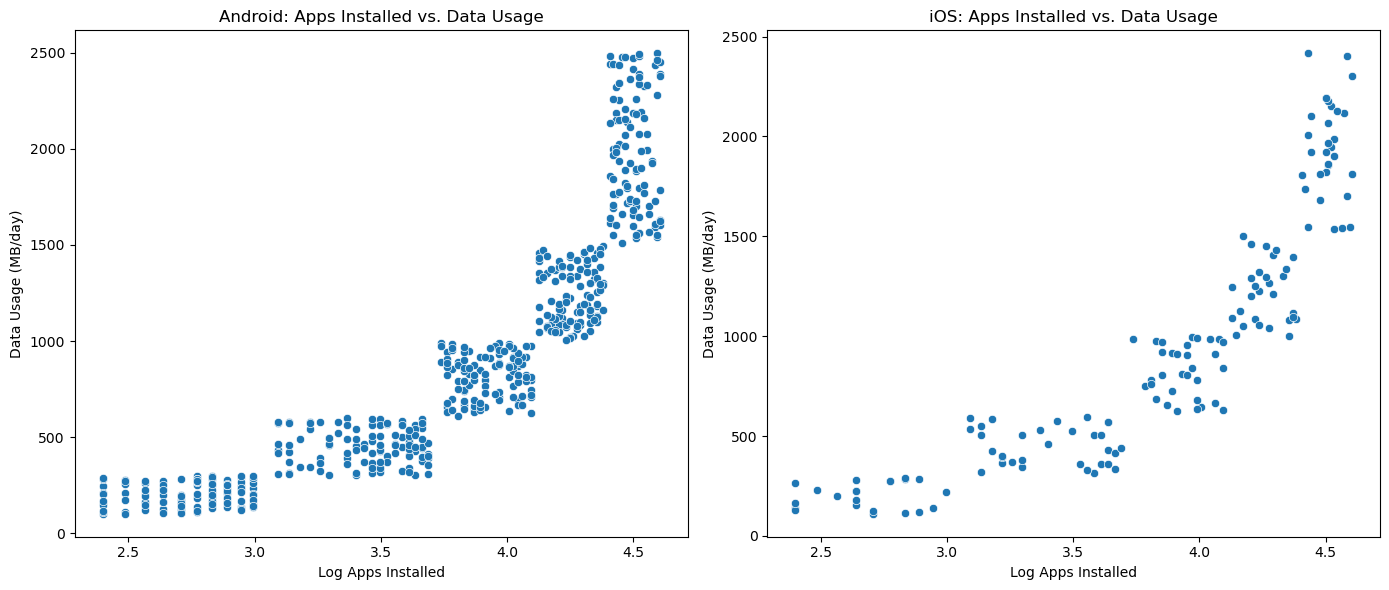

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Log Apps Installed', y='Data Usage (MB/day)', data=data[data['Operating System'] == 'Android'])
plt.title('Android: Apps Installed vs. Data Usage')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Log Apps Installed', y='Data Usage (MB/day)', data=data[data['Operating System'] == 'iOS'])
plt.title('iOS: Apps Installed vs. Data Usage')

plt.tight_layout()
plt.show()

Based on the results of correlation analysis and also all the graphs above, we can conclude that
- **Entire Dataset**:
    - Across the entire dataset, there is a clear non-linear relationship between the number of apps installed (log-transformed) and data usage (MB/day).
    - Data usage grows moderately at first for users with fewer apps installed but increases sharply beyond a log scale of approximately 3.5. This suggests that users with many installed apps tend to consume significantly more data, likely due to background activities, app updates, and usage of data-heavy apps.
- **By Operating System**:
    - **Android**:
        - Data usage begins to rise significantly when the log-transformed number of apps exceeds 3.5.
        - The increase in data usage is relatively consistent and steeper at higher app counts, indicating that additional apps contribute increasingly to daily data consumption.
    - **iOS**:
        - For lower app counts, iOS users consume slightly less data than Android users.
        - A sharp increase in data usage starts later than Android, around a log scale of 3.5, but the pattern remains non-linear, with exponential growth in data usage for higher app counts.

**Overall Conclusion**:
- Both Android and iOS users exhibit a non-linear relationship between the number of apps installed and data usage. The more apps installed, the higher the data usage, with a steep exponential rise at higher app counts.
- While the general trend is similar across operating systems, Android users tend to experience an earlier and more rapid increase in data usage compared to iOS users at lower app counts.
- This analysis highlights the impact of app installations on data consumption, suggesting that managing app usage and background activities could be important for optimizing data usage, particularly for users with many installed apps.

#### 4.6. Which age group uses the most mobile data and what does it reflect?

**Benefit**:
- Gain deeper insights into the habits and needs of mobile data consumption across age groups.
- Help telecommunication providers optimize data plans tailored to each customer group.
- Support researchers in studying user behavior in the field of information and communication technology.

**How to find the answer using data**:
- Group data by age group

In [30]:
bins = [18, 25, 35, 50, 100]  
labels = ['18-25', '26-35', '36-50', '>50']  
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

- Calculate the average data consumption for each group

In [31]:
average_data_usage = data.groupby("Age Group")["Data Usage (MB/day)"].mean().reset_index()
average_data_usage = average_data_usage.dropna()
most_data_usage_group = average_data_usage.loc[average_data_usage["Data Usage (MB/day)"].idxmax()]
print(f"Age group with the highest data consumption: {most_data_usage_group['Age Group']}")

Age group with the highest data consumption: 18-25


- Visualize the average data usage by age group

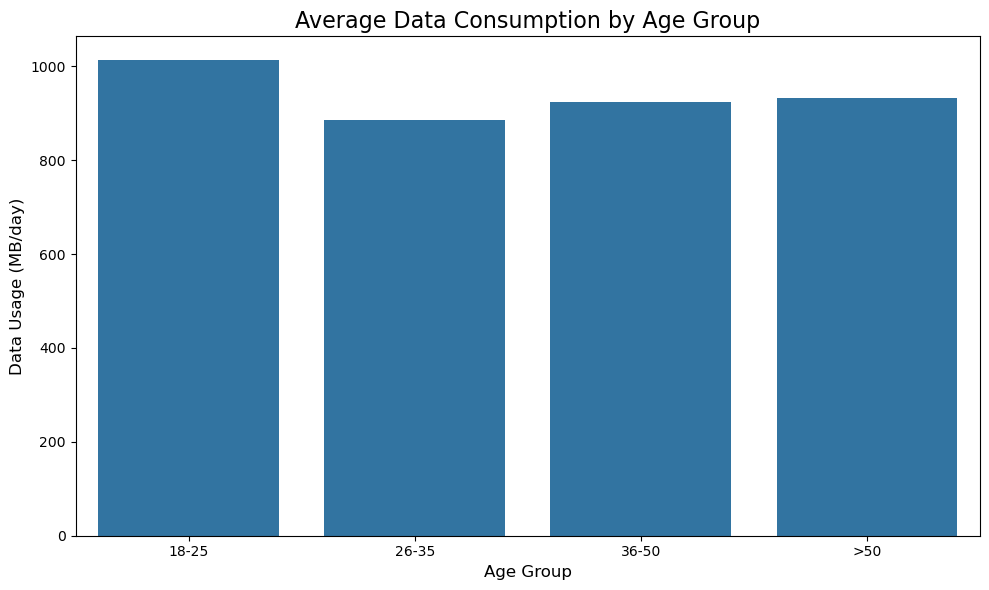

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_data_usage, 
    x="Age Group", 
    y="Data Usage (MB/day)", 
)
plt.title("Average Data Consumption by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Data Usage (MB/day)", fontsize=12)
plt.tight_layout()
plt.show()

**Comment**:
- The age group 18-25 having the highest data consumption reflects their high engagement with digital content, including social media, streaming services, and online gaming, all of which require significant data. As a tech-savvy generation, they are comfortable with technology and rely heavily on smartphones and connected devices. Many are students or early-career professionals who use online platforms for education, virtual meetings, and career development, further increasing their data usage. Additionally, their focus on socializing, entertainment, and leisure contributes to their high data consumption.
- This pattern highlights their lifestyle, which is deeply integrated with digital technology for both personal and professional purposes These findings emphasize the need for tailored data plans and digital services to cater to this group’s high demands, ensuring seamless connectivity and satisfaction.

## 5. Reflection

### 5.1. What difficulties have you encountered?

- **Nguyễn Duy Bảo**  
    - The data exploration and processing phase was time-consuming due to the large number of columns and data points.
    - Formulating insightful questions was challenging as I wanted them to be complex enough to yield valuable insights, requiring much deliberation on which questions to prioritize.
    - Having a clear understanding of the data was crucial for smoother analysis.
    - Drawing conclusions and providing insights required attention to detail to ensure clarity and understanding.
    - Presenting the results clearly and simply was important to effectively communicate the key findings.

- **Lê Gia Huy** 
    - The most difficult part was formulating clear, valuable, and non-ambiguous questions.
    - Providing objective, data-driven comments based on statistics was tricky.
    - I found it challenging to dig deeper into the data and explore different perspectives.
    - Broadening the questions to reflect more aspects of the data was a struggle.
    - Time management was tough, especially balancing the project with exam preparations. 


### 5.2. What have you learned?

- **Nguyễn Duy Bảo**  
    - Gained insights into user behavior through data analysis of variables like `App Usage Time`, `Battery Drain`, and `Data Usage`.
    - Gained more experience with data processing, including handling columns like `Device Model`, `Operating System`, and `Age`.
    - Learned how to select appropriate charts for visualizing relationships between variables like `Screen On Time` and `Battery Drain`.
    - Improved my skills in presenting data and writing clear comments on insights derived from the dataset.
    - Have a better knowledge of "Liner Regression" model

- **Lê Gia Huy**
    - Learned how to explore a dataset, focusing on columns such as `User ID`, `Device Model`, and `Gender` for deeper analysis.
    - Gained experience with Python, particularly using the pandas library for handling data like `App Usage Time` and `Number of Apps Installed`.
    - Realized that some columns, like `User Behavior` Class, may not always be directly useful for certain types of analysis.
    - Learned the importance of formulating the right questions, such as how `Age` affects `App Usage Time`, to reveal valuable insights from the data.
    - Calculating and applying "slope" and "intercept" in "Linear Regression" Model in answering questions



### 5.3. If we had more time, we would:

- Analyze user behavior in depth: Investigate how user behavior correlates with other variables.
- Explore device and OS impact: Examine how device models and operating systems affect app usage and data consumption.
- Understand battery and data usage: Identify factors affecting battery drain and data usage.
- Improve data preprocessing: Refine data cleaning for more accurate analysis.
- Enhance chart explanations: Improve visualizations and explore additional aspects of user behavior.


## 7. References
- Linear Regression: https://www.geeksforgeeks.org/ml-linear-regression/
- Correlation: https://www.geeksforgeeks.org/what-is-correlation-analysis/
- Slope and Intercept: https://www.w3schools.com/datascience/ds_linear_slope.asp
- Seaborn plots: https://www.geeksforgeeks.org/types-of-seaborn-plots/